In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("advertising.csv")

In [3]:
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [4]:
df.shape

(200, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<Axes: xlabel='TV', ylabel='Count'>

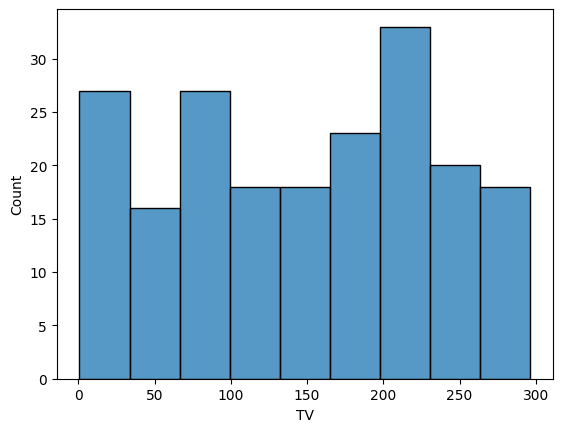

In [7]:
sns.histplot(df["TV"])

<Axes: xlabel='Radio', ylabel='Count'>

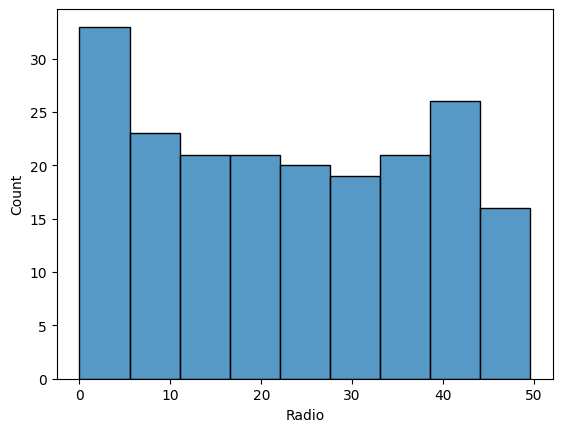

In [8]:
sns.histplot(df["Radio"])

<Axes: xlabel='Newspaper', ylabel='Count'>

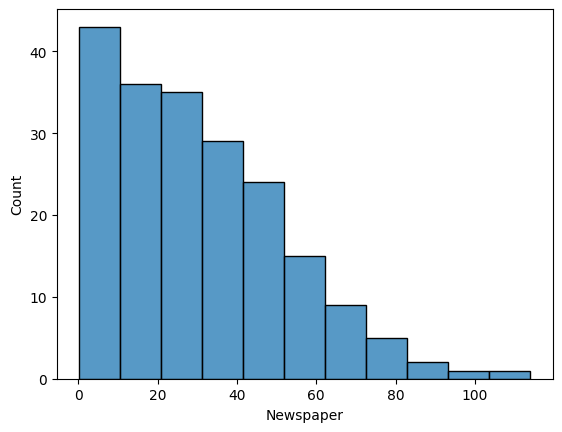

In [9]:
sns.histplot(df["Newspaper"])

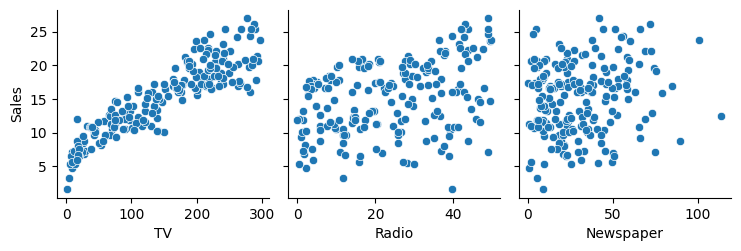

In [10]:
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',kind='scatter')

<Axes: >

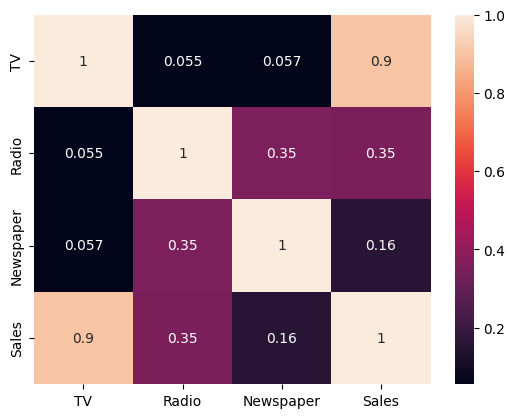

In [21]:
sns.heatmap(df.corr(),annot=True)

In [12]:
scaler = StandardScaler()

In [13]:
columns_to_scale = ['TV', 'Radio','Newspaper']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [14]:
X=df.drop(columns='Sales')
Y=df['Sales']

In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)

In [16]:
model=LinearRegression()
model.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
prediction=model.predict(X_test)
prediction

array([17.99747206, 11.02863798, 19.14207387, 15.16467067,  8.56496638,
       10.89550601, 24.92202604, 10.61757023, 18.6998404 , 17.29854871,
       14.66680343, 13.03094656, 19.28219899, 10.98418026, 13.7677926 ,
       14.4988402 , 16.92235556, 17.30704485, 17.78993353, 21.29009711,
       19.23977212, 10.98691684,  9.77272715, 11.18064352,  8.34136167,
       13.13093624, 21.59478295, 17.04191764, 24.83365506, 11.62133637,
       16.22765284, 21.95021111,  9.21285178,  9.94421377,  9.82032335,
       10.22691037, 15.74967394,  9.51795157, 13.67254607, 12.42186513])

In [18]:
accuracy_score=model.score(X_test,Y_test)*100

In [22]:
print(f"Accuracy of model: {int(accuracy_score)}%")

Accuracy of model: 91%
